## Master M2 MVA 2017/2018 - Graphical models - HWK 1
### WANG Yifan && CHU Xiao

This jupyter notebook contains code of our homework. All written responses are showed in the pdf file.

In [1]:
import pandas as pd
import numpy as np
import math
from numpy.linalg import inv
import matplotlib.pyplot as plt
from matplotlib import colors

%matplotlib inline

## 2 Linear classification

### 2.1 Generative model (LDA)

As we have demonstrated in the pdf, we obtain the form of maximum likelihood estimator as showed below:

$$\widehat{\pi}=\frac{\sum_{i=1}^{n}y_i}{n}$$.
$$\hat{\mu_i}=\bar{x_i}=\frac{1}{\sum_{j=1}^{n}{1}_{y_j=i}}\sum_{j=1}^{n}x_j {1}_{y_j=i}$$

$$\hat{\Sigma } = \sum_{i=0}^{1} \frac{n_i}{n}\hat{\Sigma_i}=\frac{1}{n}\sum_{i=0}^{1} \sum_{j=1}^{n} 1_{y_j=i}(x_j-\bar{x_i})(x_j-\bar{x_i})^T$$


$$P(y=1|x) = \frac{1}{1+\frac{1-\pi}{\pi}exp(-(w^T x+b))}$$
where $w=\Sigma^{-1}(\mu_1-\mu_0)$ and $b=\frac{1}{2}\mu_0^T\Sigma^{-1}\mu_0-\frac{1}{2}\mu_1^T\Sigma^{-1}\mu_1$.

**(c) Implement the MLE for this model and apply it to the data. Represent graphically the data as a point cloud in R2 and the line defined by the equation p(y = 1|x) = 0.5**

We define a function called MLE_LDA to implement the MLE for this model.

In [2]:
def MLE_LDA(TrainData):
    # data whose label = 1
    data_label1 = TrainData[TrainData.y==1.0]
    # data whose label = 0
    data_label0 = TrainData[TrainData.y==0.0]
    # compute pi
    pi = len(data_label1) * 1.0 / len(TrainData)
    # initialization
    mu1 = np.zeros(2)
    mu0 = np.zeros(2)
    # compute mu0 and mu1
    mu1[0] = np.sum(data_label1.x1)/ len(data_label1)
    mu1[1] = np.sum(data_label1.x2)/ len(data_label1)
    mu0[0] = np.sum(data_label0.x1)/ len(data_label0)
    mu0[1] = np.sum(data_label0.x2)/ len(data_label0)
    # compute sigma1
    x1x1 = x1x2 = x2x2 = 0
    for i in data_label1.index:
        x1x1 = x1x1 + (data_label1.x1[i] - mu1[0]) ** 2
        x2x2 = x2x2 + (data_label1.x2[i] - mu1[1]) ** 2
        x1x2 = x1x2 + (data_label1.x1[i] - mu1[0]) * (data_label1.x2[i] - mu1[1])
    sigma1 = np.zeros((2,2))
    l1 = len(data_label1)
    sigma1[0][0] = x1x1/l1
    sigma1[0][1] = x1x2/l1
    sigma1[1][0] = x1x2/l1
    sigma1[1][1] = x2x2/l1
    # compute sigma0
    x1x1 = x1x2 = x2x2 = 0
    for i in data_label0.index:
        x1x1 = x1x1 + (data_label0.x1[i] - mu0[0]) ** 2
        x2x2 = x2x2 + (data_label0.x2[i] - mu0[1]) ** 2
        x1x2 = x1x2 + (data_label0.x1[i] - mu0[0]) * (data_label0.x2[i] - mu0[1])
    sigma0 = np.zeros((2,2))
    l0 = len(data_label0)
    sigma0[0][0] = x1x1/l0
    sigma0[0][1] = x1x2/l0
    sigma0[1][0] = x1x2/l0
    sigma0[1][1] = x2x2/l0
    # compute sigma as the weighted average of sigma0 and sigma1
    sigma = np.zeros((2,2))
    sigma = pi * sigma1 + (1-pi) * sigma0
    return pi, mu0, mu1, sigma

In [3]:
# import training data and test data
PATH = "classification_data_HWK1/"
trainA = pd.read_csv(PATH + "classificationA.train", delim_whitespace = True, header=None, names = ['x1','x2','y'])
trainB = pd.read_csv(PATH + "classificationB.train", delim_whitespace = True, header=None, names = ['x1','x2','y'])
trainC = pd.read_csv(PATH + "classificationC.train", delim_whitespace = True, header=None, names = ['x1','x2','y'])
testA = pd.read_csv(PATH + "classificationA.test", delim_whitespace = True, header=None, names = ['x1','x2','y'])
testB = pd.read_csv(PATH + "classificationB.test", delim_whitespace = True, header=None, names = ['x1','x2','y'])
testC = pd.read_csv(PATH + "classificationC.test", delim_whitespace = True, header=None, names = ['x1','x2','y'])

For $p(y = 1|x) = 0.5$, we should have: $$\frac{1-\pi}{\pi}exp(-(\Sigma^{-1}(\mu_1-\mu_0))^T x + \frac{1}{2}\mu_0^T\Sigma^{-1}\mu_0-\frac{1}{2}\mu_1^T\Sigma^{-1}\mu_1))) = 1$$

It means that $$w^T x + b= - log(\frac{\pi}{1-\pi})$$ where $w=\Sigma^{-1}(\mu_1-\mu_0)$ and $b=\frac{1}{2}\mu_0^T\Sigma^{-1}\mu_0-\frac{1}{2}\mu_1^T\Sigma^{-1}\mu_1$.

In [4]:
# we define a function find_line to find the decision boundary defined by the equation p(y = 1|x) = 0.5
def find_line(pi, mu0, mu1, sigma):
    # calculate the inverse matrix of sigma
    sigma_inv = inv(sigma)
    # compute w and b
    w = sigma_inv.dot(mu1 - mu0)
    b = 0.5 * mu0.T.dot(sigma_inv).dot(mu0) - 0.5 * mu1.T.dot(sigma_inv).dot(mu1)
    # find two points in this line and return these two points
    point1_x = -8
    point1_y = (-math.log(pi/(1-pi))-b-point1_x*w[0])*1.0/w[1]
    point2_x = 8
    point2_y = (-math.log(pi/(1-pi))-b-point2_x*w[0])*1.0/w[1]
    return point1_x, point1_y, point2_x, point2_y

In [5]:
pi_A, mu0_A, mu1_A, sigma_A = MLE_LDA(trainA)
point1_x, point1_y, point2_x, point2_y = find_line(pi_A, mu0_A, mu1_A, sigma_A)
print "The numerical values of the leart parameters for ClassificationA Training Data:"
print MLE_LDA(trainA)

The numerical values of the leart parameters for ClassificationA Training Data:
(0.3333333333333333, array([ 2.89970947, -0.893874  ]), array([-2.69232004,  0.866042  ]), array([[ 2.44190897, -1.13194024],
       [-1.13194024,  0.61375465]]))


In [6]:
pi_B, mu0_B, mu1_B, sigma_B = MLE_LDA(trainB)
point1_x, point1_y, point2_x, point2_y = find_line(pi_B, mu0_B, mu1_B, sigma_B)
print "The numerical values of the leart parameters for ClassificationB Training Data:"
print MLE_LDA(trainB)

The numerical values of the leart parameters for ClassificationB Training Data:
(0.5, array([ 3.34068896, -0.83546333]), array([-3.21670734,  1.08306733]), array([[ 3.34623467, -0.13516489],
       [-0.13516489,  1.73807475]]))


In [7]:
pi_C, mu0_C, mu1_C, sigma_C = MLE_LDA(trainC)
point1_x, point1_y, point2_x, point2_y = find_line(pi_C, mu0_C, mu1_C, sigma_C)
print "The numerical values of the leart parameters for ClassificationC Training Data:"
print MLE_LDA(trainC)

The numerical values of the leart parameters for ClassificationC Training Data:
(0.625, array([ 2.79304824, -0.83838667]), array([-2.94232885, -0.9578284 ]), array([[ 2.88039225, -0.63405081],
       [-0.63405081,  5.19952435]]))


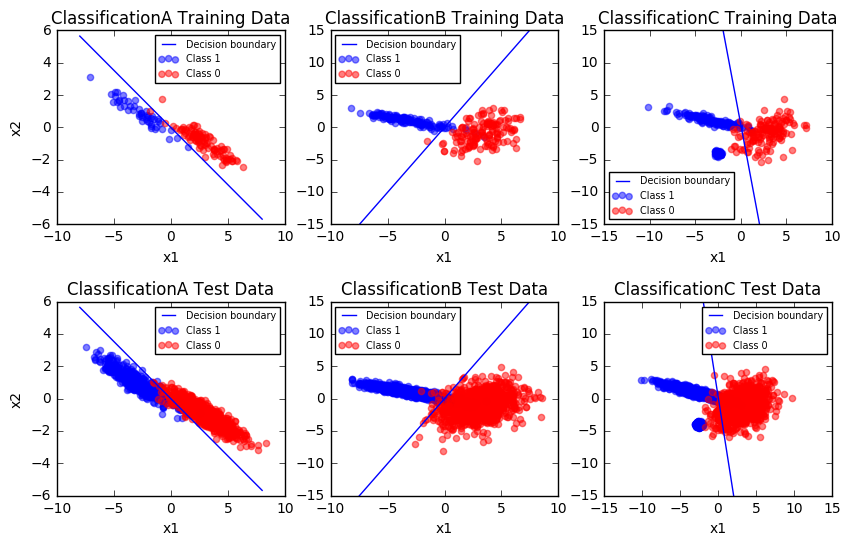

In [8]:
# Six subplots to represent graphically the data as a point cloud in R2 and the line defined by the equation p(y = 1|x) = 0.5
f, axarr = plt.subplots(2, 3, figsize=(10,6))
axarr[0,0].scatter(trainA[trainA.y==1.0].x1, trainA[trainA.y==1.0].x2, color="blue", alpha=0.5, label = "Class 1")
axarr[0,0].scatter(trainA[trainA.y==0.0].x1, trainA[trainA.y==0.0].x2, color="red", alpha=0.5, label = "Class 0")
point1_x, point1_y, point2_x, point2_y = find_line(pi_A, mu0_A, mu1_A, sigma_A)
axarr[0,0].plot([point1_x, point2_x],[point1_y, point2_y], label = "Decision boundary")
axarr[0,0].set_ylim([-6,6])
axarr[0,0].set_xlabel('x1')
axarr[0,0].set_ylabel('x2')
axarr[0,0].legend(loc="best", fontsize = 'x-small') 
axarr[0,0].set_title('ClassificationA Training Data')

axarr[1,0].scatter(testA[testA.y==1.0].x1, testA[testA.y==1.0].x2, color="blue", alpha=0.5, label = "Class 1")
axarr[1,0].scatter(testA[testA.y==0.0].x1, testA[testA.y==0.0].x2, color="red", alpha=0.5, label = "Class 0")
axarr[1,0].plot([point1_x, point2_x],[point1_y, point2_y], label = "Decision boundary")
axarr[1,0].set_ylim([-6,6])
axarr[1,0].set_xlabel('x1')
axarr[1,0].set_ylabel('x2')
axarr[1,0].legend(loc="best", fontsize = 'x-small') 
axarr[1,0].set_title('ClassificationA Test Data')

axarr[0,1].scatter(trainB[trainB.y==1.0].x1, trainB[trainB.y==1.0].x2, color="blue", alpha=0.5, label = "Class 1")
axarr[0,1].scatter(trainB[trainB.y==0.0].x1, trainB[trainB.y==0.0].x2, color="red", alpha=0.5, label = "Class 0")
point1_x, point1_y, point2_x, point2_y = find_line(pi_B, mu0_B, mu1_B, sigma_B)
axarr[0,1].plot([point1_x, point2_x],[point1_y, point2_y], label = "Decision boundary")
axarr[0,1].set_ylim([-15,15])
axarr[0,1].set_xlabel('x1')
axarr[0,1].legend(loc="best", fontsize = 'x-small')
axarr[0,1].set_title('ClassificationB Training Data')

axarr[1,1].scatter(testB[testB.y==1.0].x1, testB[testB.y==1.0].x2, color="blue", alpha=0.5, label = "Class 1")
axarr[1,1].scatter(testB[testB.y==0.0].x1, testB[testB.y==0.0].x2, color="red", alpha=0.5, label = "Class 0")
axarr[1,1].plot([point1_x, point2_x],[point1_y, point2_y], label = "Decision boundary")
axarr[1,1].set_ylim([-15,15])
axarr[1,1].set_xlabel('x1')
axarr[1,1].legend(loc="best", fontsize = 'x-small') 
axarr[1,1].set_title('ClassificationB Test Data')

axarr[0,2].scatter(trainC[trainC.y==1.0].x1, trainC[trainC.y==1.0].x2, color="blue", alpha=0.5, label = "Class 1")
axarr[0,2].scatter(trainC[trainC.y==0.0].x1, trainC[trainC.y==0.0].x2, color="red", alpha=0.5, label = "Class 0")
point1_x, point1_y, point2_x, point2_y = find_line(pi_C, mu0_C, mu1_C, sigma_C)
axarr[0,2].plot([point1_x, point2_x],[point1_y, point2_y], label = "Decision boundary")
axarr[0,2].set_ylim([-15,15])
axarr[0,2].set_xlabel('x1')
axarr[0,2].legend(loc="best", fontsize = 'x-small')
axarr[0,2].set_title('ClassificationC Training Data')

axarr[1,2].scatter(testC[testC.y==1.0].x1, testC[testC.y==1.0].x2, color="blue", alpha=0.5, label = "Class 1")
axarr[1,2].scatter(testC[testC.y==0.0].x1, testC[testC.y==0.0].x2, color="red", alpha=0.5, label = "Class 0")
axarr[1,2].plot([point1_x, point2_x],[point1_y, point2_y], label = "Decision boundary")
axarr[1,2].set_ylim([-15,15])
axarr[1,2].set_xlabel('x1')
axarr[1,2].legend(loc="best", fontsize = 'x-small') 
axarr[1,2].set_title('ClassificationC Test Data')

f.subplots_adjust(hspace=0.4)
plt.show()

In [9]:
# define a function to get the predict probability of LDA
def LDA_predict(TestData, pi, mu0, mu1, sigma):
    predict_prob = np.zeros((len(TestData),2))
    sigma_inv = inv(sigma)
    # compute w and b
    w = sigma_inv.dot(mu1 - mu0)
    b = 0.5 * mu0.T.dot(sigma_inv).dot(mu0) - 0.5 * mu1.T.dot(sigma_inv).dot(mu1)
    factor = (1-pi)/pi
    for i in range(len(TestData)):
        xi = np.zeros(2)
        xi[0] = TestData[i][0]
        xi[1] = TestData[i][1]
        # compute the probability of y=1|x
        tmp = w.T.dot(xi) + b
        proba1 = 1.0/(1+factor*np.exp(-tmp))
        predict_prob[i][0] = 1 - proba1
        predict_prob[i][1] = proba1
    return predict_prob

In [10]:
# define a function to calculate the misclassification error of LDA
def mis_error_LDA(TestData, pi, mu0, mu1, sigma):
    # set the X to represent the coordinate of points
    X = np.zeros((len(TestData),2))
    for i in range(len(TestData)):
        X[i][0] = TestData.x1[i]
        X[i][1] = TestData.x2[i]
    # use predict_proba to get the predict probability
    predict_proba = LDA_predict(X, pi, mu0, mu1, sigma)
    # to count how many data are well classifies
    true_count = 0
    predict = np.zeros(len(TestData))
    for i in range(len(TestData)):
        # to decide the label of a point
        if predict_proba[i][0]>=predict_proba[i][1]:
            predict[i] = 0
        else:
            predict[i] = 1
        # verify if this label is true or false
        if predict[i]==TestData.y[i]:
            true_count += 1
    # return the misclassification error
    return 1 - true_count * 1.0 / (len(TestData))

In [11]:
print "LDA classification error of training data A: " + str(mis_error_LDA(trainA, pi_A, mu0_A, mu1_A, sigma_A))

LDA classification error of training data A: 0.0133333333333


In [12]:
print "LDA classification error of test data A: " + str(mis_error_LDA(testA, pi_A, mu0_A, mu1_A, sigma_A))

LDA classification error of test data A: 0.02


In [13]:
print "LDA classification error of training data B: " + str(mis_error_LDA(trainB, pi_B, mu0_B, mu1_B, sigma_B))

LDA classification error of training data B: 0.03


In [14]:
print "LDA classification error of test data B: " + str(mis_error_LDA(testB, pi_B, mu0_B, mu1_B, sigma_B))

LDA classification error of test data B: 0.0415


In [15]:
print "LDA classification error of training data C: " + str(mis_error_LDA(trainC, pi_C, mu0_C, mu1_C, sigma_C))

LDA classification error of training data C: 0.055


In [16]:
print "LDA classification error of test data C: " + str(mis_error_LDA(testC, pi_C, mu0_C, mu1_C, sigma_C))

LDA classification error of test data C: 0.0423333333333


### 2.2 Logistic Regression

In [17]:
def sigmoid(x):
    # To avoid overflow in exp
    x[x > 100] = 100
    x[x < -100] = -100
    return 1./(1.+np.exp(-x))

class LogisticRegression(object):
    def __init__(self):
        self.W = None
        self.likelyhoods = None
        pass
        
    def train(self, X, y, line_search=True):
        n, p = X.shape
        X2 = np.concatenate((X, np.ones((n, 1))), axis=1)
        # the bias term is included in W
        W = np.zeros(p+1)
        
        def likelyhood(W):
            return y.dot(np.log(sigmoid(X2.dot(W)))) + (1-y).dot(np.log(sigmoid(-X2.dot(W))))
        
        self.likelyhoods = []
        change = 1
        while change > 1e-6:
            eta = sigmoid(X2.dot(W))
            grad_W = X2.T.dot(y-eta)
            H = - X2.T.dot(np.diag(eta*(1-eta))).dot(X2)
            
            if line_search:
                # Armijo line search
                a = 0.5 # decay rate
                t = 1.
                update = - np.linalg.inv(H).dot(grad_W)
                while likelyhood(W + t*update) < likelyhood(W) + 0.5 * t * grad_W.dot(update):
                    t *= a
            else:
                t = 1
            
            change = np.sqrt(np.sum(t*update**2))#likelyhood(W + t*update) - likelyhood(W)
            W += t * update
            self.likelyhoods.append(likelyhood(W))
        
        self.W = W
        
    def getW(self):
        return self.W
    
    def getLikelyhoods(self):
        return self.likelyhoods
        
        
    def predict(self, X): 
        n, p = X.shape
        X2 = np.concatenate((X, np.ones((n, 1))), axis=1)
        pred = sigmoid(X2.dot(self.W))
        pred[pred>0.5] = 1
        pred[pred <= 0.5] = 0
        return pred

In [18]:
trainA = np.loadtxt("classification_data_HWK1/classificationA.train")
testA = np.loadtxt("classification_data_HWK1/classificationA.test")

trainB = np.loadtxt("classification_data_HWK1/classificationB.train")
testB = np.loadtxt("classification_data_HWK1/classificationB.test")

trainC = np.loadtxt("classification_data_HWK1/classificationC.train")
testC = np.loadtxt("classification_data_HWK1/classificationC.test")

In [19]:
clf = LogisticRegression()
clf.train(trainA[:,:2], trainA[:,2])
WA = clf.getW()
print WA
print WA/WA[2]

clf = LogisticRegression()
clf.train(trainB[:,:2], trainB[:,2])
WB = clf.getW()
print WB
print WB/WB[2]

clf = LogisticRegression()
clf.train(trainC[:,:2], trainC[:,2])
WC = clf.getW()
print WC
print WC/WC[2]

[-1019.47843117 -1766.52038066  -168.81841671]
[  6.0389053   10.46402647   1.        ]
[-1.70518586  1.02378538  1.34959157]
[-1.26348289  0.75858904  1.        ]
[-2.20323233  0.70926557  0.9591888 ]
[-2.29697462  0.73944313  1.        ]


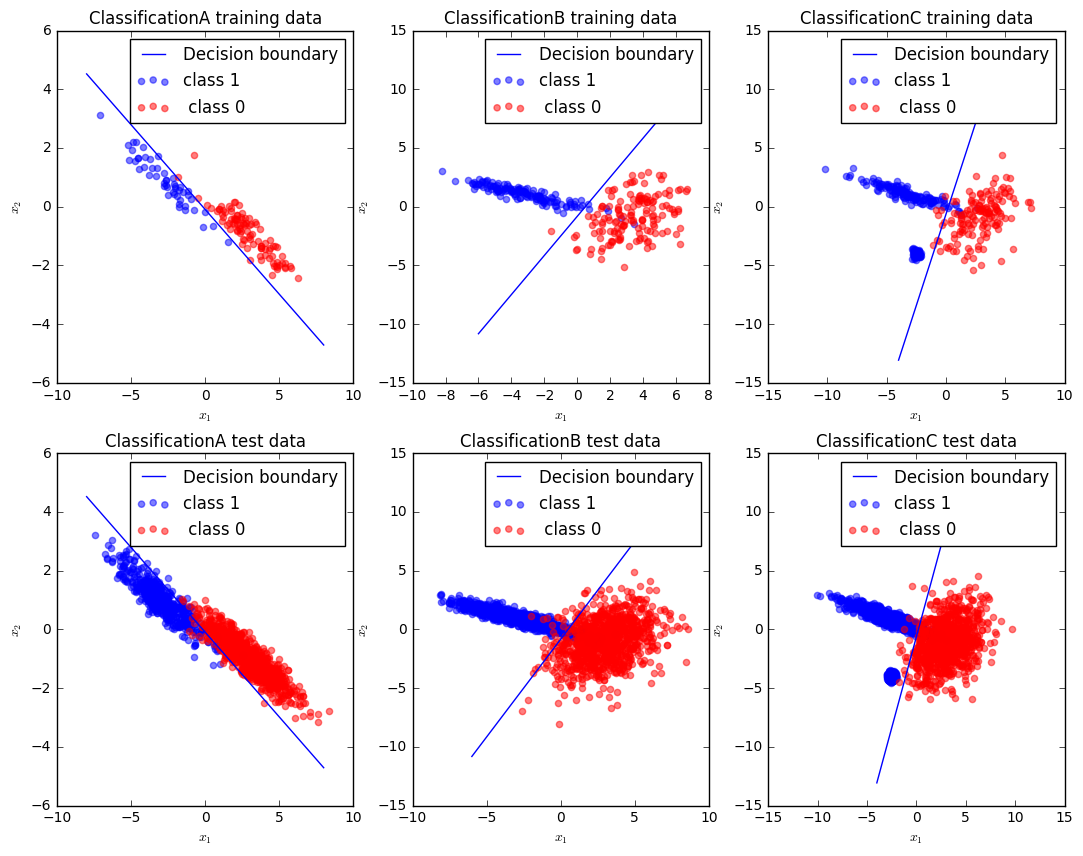

In [20]:
f, axarr = plt.subplots(2,3, figsize=(13,10))
x = np.array([-8, 8])
y = (-WA[2]-WA[0]*x + 0.5) / WA[1]

axarr[0,0].plot(x, y)
axarr[0,0].scatter(trainA[:,0][trainA[:,2] == 1], trainA[:,1][trainA[:,2] == 1], color="blue", alpha=0.5)
axarr[0,0].scatter(trainA[:,0][trainA[:,2] == 0], trainA[:,1][trainA[:,2] == 0], color="red", alpha=0.5)
axarr[0,0].set_title("ClassificationA training data")
axarr[0,0].legend(("Decision boundary","class 1"," class 0"))
axarr[0,0].set_xlabel("$x_1$")
axarr[0,0].set_ylabel("$x_2$")

axarr[0,1].scatter(trainB[:,0][trainB[:,2] == 1], trainB[:,1][trainB[:,2] == 1], color="blue", alpha=0.5)
axarr[0,1].scatter(trainB[:,0][trainB[:,2] == 0], trainB[:,1][trainB[:,2] == 0], color="red", alpha=0.5)
x = np.array([-6, 6])
y = (-WB[2]-WB[0]*x + 0.5) / WB[1]
axarr[0,1].plot(x,y)
axarr[0,1].set_title("ClassificationB training data")
axarr[0,1].legend(("Decision boundary","class 1"," class 0"))
axarr[0,1].set_xlabel("$x_1$")
axarr[0,1].set_ylabel("$x_2$")

axarr[0,2].scatter(trainC[:,0][trainC[:,2] == 1], trainC[:,1][trainC[:,2] == 1], color="blue", alpha=0.5)
axarr[0,2].scatter(trainC[:,0][trainC[:,2] == 0], trainC[:,1][trainC[:,2] == 0], color="red", alpha=0.5)
x = np.array([-4, 4])
y = (-WC[2]-WC[0]*x  + 0.5) / WC[1]
axarr[0,2].plot(x,y)
axarr[0,2].set_title("ClassificationC training data")
axarr[0,2].legend(("Decision boundary","class 1"," class 0"))
axarr[0,2].set_xlabel("$x_1$")
axarr[0,2].set_ylabel("$x_2$")

x = np.array([-8, 8])
y = (-WA[2]-WA[0]*x + 0.5) / WA[1]
axarr[1,0].plot(x, y)
axarr[1,0].scatter(testA[:,0][testA[:,2] == 1], testA[:,1][testA[:,2] == 1], color="blue", alpha=0.5)
axarr[1,0].scatter(testA[:,0][testA[:,2] == 0], testA[:,1][testA[:,2] == 0], color="red", alpha=0.5)
axarr[1,0].set_title("ClassificationA test data")
axarr[1,0].legend(("Decision boundary","class 1"," class 0"))
axarr[1,0].set_xlabel("$x_1$")
axarr[1,0].set_ylabel("$x_2$")

axarr[1,1].scatter(testB[:,0][testB[:,2] == 1], testB[:,1][testB[:,2] == 1], color="blue", alpha=0.5)
axarr[1,1].scatter(testB[:,0][testB[:,2] == 0], testB[:,1][testB[:,2] == 0], color="red", alpha=0.5)
x = np.array([-6, 6])
y = (-WB[2]-WB[0]*x + 0.5) / WB[1]
axarr[1,1].plot(x,y)
axarr[1,1].set_title("ClassificationB test data")
axarr[1,1].legend(("Decision boundary","class 1"," class 0"))
axarr[1,1].set_xlabel("$x_1$")
axarr[1,1].set_ylabel("$x_2$")

axarr[1,2].scatter(testC[:,0][testC[:,2] == 1], testC[:,1][testC[:,2] == 1], color="blue", alpha=0.5)
axarr[1,2].scatter(testC[:,0][testC[:,2] == 0], testC[:,1][testC[:,2] == 0], color="red", alpha=0.5)
x = np.array([-4, 4])
y = (-WC[2]-WC[0]*x  + 0.5) / WC[1]
axarr[1,2].plot(x,y)
axarr[1,2].set_title("ClassificationC test data")
axarr[1,2].legend(("Decision boundary","class 1"," class 0"))
axarr[1,2].set_xlabel("$x_1$")
axarr[1,2].set_ylabel("$x_2$")
plt.show()


### 2.3 Linear Regression

In [21]:
# linear regression
class LinearRegression(object):
    def __init__(self):
        self.W = None
        pass
        
    def train(self, X, y, line_search=True):
        n, p = X.shape
        X2 = np.concatenate((X, np.ones((n, 1))), axis=1)
        # the bias term is included in W
        W = np.linalg.inv(X2.T.dot(X2)).dot(X2.T).dot(y)
        self.W = W
        
    def getW(self):
        return self.W

    def predict(self, X): 
        n, p = X.shape
        X2 = np.concatenate((X, np.ones((n, 1))), axis=1)
        pred = X2.dot(self.W)
        pred[pred>0.5] = 1
        pred[pred <= 0.5] = 0
        return pred
    
    

In [22]:
clf = LinearRegression()
clf.train(trainA[:,:2], trainA[:,2])
WA = clf.getW()
print WA

clf = LinearRegression()
clf.train(trainB[:,:2], trainB[:,2])
WB = clf.getW()
print WB

clf = LinearRegression()
clf.train(trainC[:,:2], trainC[:,2])
WC = clf.getW()
print WC

[-0.2640075  -0.37259311  0.49229204]
[-0.10424575  0.05179118  0.50005043]
[-0.12769333 -0.01700142  0.50839982]


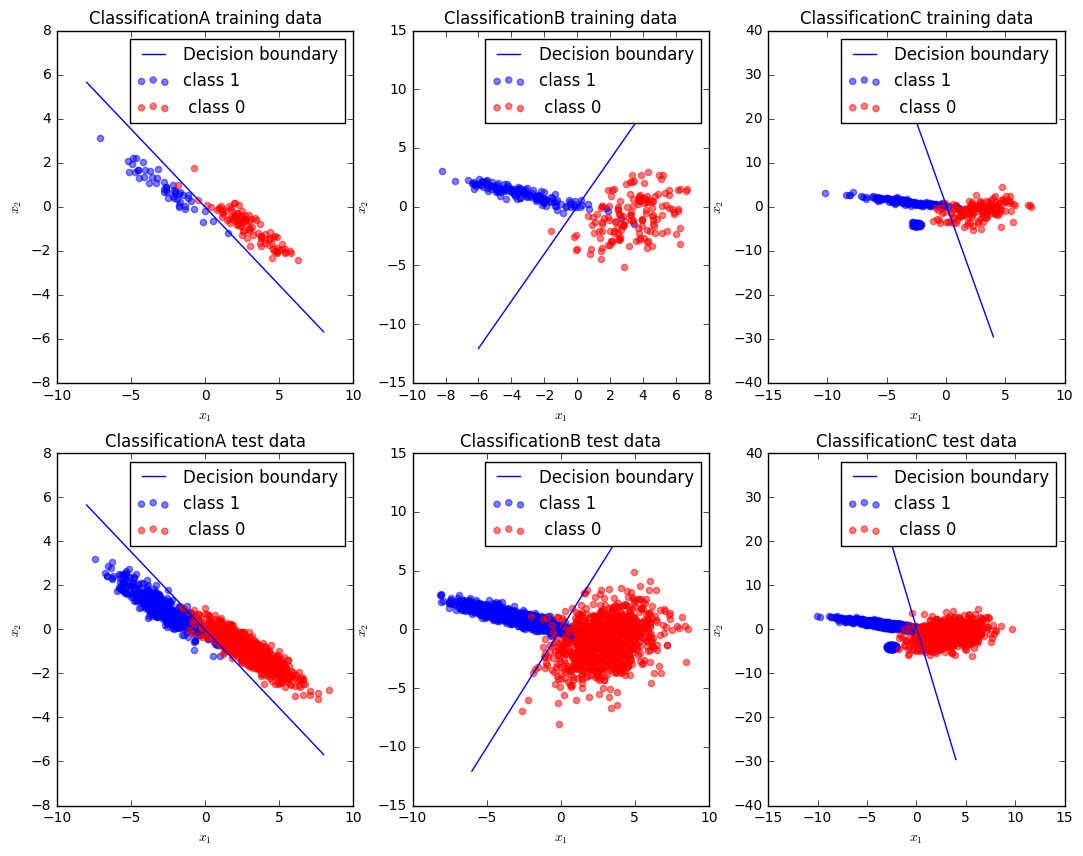

In [23]:
f, axarr = plt.subplots(2,3, figsize=(13,10))
x = np.array([-8, 8])
y = (-WA[2]-WA[0]*x + 0.5) / WA[1]

axarr[0,0].plot(x, y)
axarr[0,0].scatter(trainA[:,0][trainA[:,2] == 1], trainA[:,1][trainA[:,2] == 1], color="blue", alpha=0.5)
axarr[0,0].scatter(trainA[:,0][trainA[:,2] == 0], trainA[:,1][trainA[:,2] == 0], color="red", alpha=0.5)
axarr[0,0].set_title("ClassificationA training data")
axarr[0,0].legend(("Decision boundary","class 1"," class 0"))
axarr[0,0].set_xlabel("$x_1$")
axarr[0,0].set_ylabel("$x_2$")

axarr[0,1].scatter(trainB[:,0][trainB[:,2] == 1], trainB[:,1][trainB[:,2] == 1], color="blue", alpha=0.5)
axarr[0,1].scatter(trainB[:,0][trainB[:,2] == 0], trainB[:,1][trainB[:,2] == 0], color="red", alpha=0.5)
x = np.array([-6, 6])
y = (-WB[2]-WB[0]*x + 0.5) / WB[1]
axarr[0,1].plot(x,y)
axarr[0,1].set_title("ClassificationB training data")
axarr[0,1].legend(("Decision boundary","class 1"," class 0"))
axarr[0,1].set_xlabel("$x_1$")
axarr[0,1].set_ylabel("$x_2$")

axarr[0,2].scatter(trainC[:,0][trainC[:,2] == 1], trainC[:,1][trainC[:,2] == 1], color="blue", alpha=0.5)
axarr[0,2].scatter(trainC[:,0][trainC[:,2] == 0], trainC[:,1][trainC[:,2] == 0], color="red", alpha=0.5)
x = np.array([-4, 4])
y = (-WC[2]-WC[0]*x  + 0.5) / WC[1]
axarr[0,2].plot(x,y)
axarr[0,2].set_title("ClassificationC training data")
axarr[0,2].legend(("Decision boundary","class 1"," class 0"))
axarr[0,2].set_xlabel("$x_1$")
axarr[0,2].set_ylabel("$x_2$")

x = np.array([-8, 8])
y = (-WA[2]-WA[0]*x + 0.5) / WA[1]
axarr[1,0].plot(x, y)
axarr[1,0].scatter(testA[:,0][testA[:,2] == 1], testA[:,1][testA[:,2] == 1], color="blue", alpha=0.5)
axarr[1,0].scatter(testA[:,0][testA[:,2] == 0], testA[:,1][testA[:,2] == 0], color="red", alpha=0.5)
axarr[1,0].set_title("ClassificationA test data")
axarr[1,0].legend(("Decision boundary","class 1"," class 0"))
axarr[1,0].set_xlabel("$x_1$")
axarr[1,0].set_ylabel("$x_2$")

axarr[1,1].scatter(testB[:,0][testB[:,2] == 1], testB[:,1][testB[:,2] == 1], color="blue", alpha=0.5)
axarr[1,1].scatter(testB[:,0][testB[:,2] == 0], testB[:,1][testB[:,2] == 0], color="red", alpha=0.5)
x = np.array([-6, 6])
y = (-WB[2]-WB[0]*x + 0.5) / WB[1]
axarr[1,1].plot(x,y)
axarr[1,1].set_title("ClassificationB test data")
axarr[1,1].legend(("Decision boundary","class 1"," class 0"))
axarr[1,1].set_xlabel("$x_1$")
axarr[1,1].set_ylabel("$x_2$")

axarr[1,2].scatter(testC[:,0][testC[:,2] == 1], testC[:,1][testC[:,2] == 1], color="blue", alpha=0.5)
axarr[1,2].scatter(testC[:,0][testC[:,2] == 0], testC[:,1][testC[:,2] == 0], color="red", alpha=0.5)
x = np.array([-4, 4])
y = (-WC[2]-WC[0]*x  + 0.5) / WC[1]
axarr[1,2].plot(x,y)
axarr[1,2].set_title("ClassificationC test data")
axarr[1,2].legend(("Decision boundary","class 1"," class 0"))
axarr[1,2].set_xlabel("$x_1$")
axarr[1,2].set_ylabel("$x_2$")
plt.show()


### 2.4 Comparison

In [24]:
# An LDA classifier class
class LDA(object):
    def __init__(self):
        self.pi = self.mu0 = self.mu1 = self.sigma = None
        self.w = self.b = None

    def train(self, X, y):
        
        data_label1 = X[y==1.0]
        data_label0 = X[y==0.0]
    
        pi = np.sum(y==1.0) * 1.0 / len(X)
        
        mu1 = np.zeros(2)
        mu0 = np.zeros(2)
        mu0 = X[y==0.].mean(axis=0)
        mu1 = X[y==1.].mean(axis=0)
        
        X1 = X[y==1] - mu1
        x1x1 = np.sum((X1[:,0])**2)
        x2x2 = np.sum((X1[:,1])**2)
        x1x2 = np.sum(X1[:,0] * X1[:,1])

        sigma1 = np.zeros((2,2))
        l1 = len(data_label1)
        sigma1[0][0] = x1x1/l1
        sigma1[0][1] = x1x2/l1
        sigma1[1][0] = x1x2/l1
        sigma1[1][1] = x2x2/l1
        
        X0 = X[y==0] - mu0
        x1x1 = np.sum((X0[:,0])**2)
        x2x2 = np.sum((X0[:,1])**2)
        x1x2 = np.sum(X0[:,0] * X0[:,1])
        
        sigma0 = np.zeros((2,2))
        l0 = len(data_label0)
        sigma0[0][0] = x1x1/l0
        sigma0[0][1] = x1x2/l0
        sigma0[1][0] = x1x2/l0
        sigma0[1][1] = x2x2/l0
        sigma = np.zeros((2,2))
        sigma = pi * sigma1 + (1-pi) * sigma0
        self.pi = pi
        self.mu0 = mu0
        self.mu1 = mu1
        self.sigma = sigma
        self.pi = pi
        
        sigma_inv = np.linalg.inv(self.sigma)
        self.w = sigma_inv.dot(self.mu1 - self.mu0)
        self.b = 0.5 * self.mu0.T.dot(sigma_inv).dot(self.mu0) - 0.5 * self.mu1.T.dot(sigma_inv).dot(self.mu1)
        
    def predict(self, X):
        pred = 1./(1+(1-self.pi)/self.pi*np.exp(-(X.dot(self.w)+self.b)))
        pred[pred>0.5] = 1
        pred[pred<=0.5] = 0
        return pred

In [25]:
def mis(pred, true):
    return np.sum(np.abs(pred-true))/pred.shape[0]

train = np.loadtxt("classification_data_HWK1/classificationA.train")
test = np.loadtxt("classification_data_HWK1/classificationA.test")

print "ClassificationA"

print "LDA"
clf = LDA()
clf.train(train[:,:2], train[:,2])
pred = clf.predict(train[:,:2])
print "trainA:", mis(pred, train[:,2])
pred = clf.predict(test[:,:2])
print "testA:", mis(pred, test[:,2])


print "\nLogisteic regression"
clf = LogisticRegression()
clf.train(train[:,:2], train[:,2])
pred = clf.predict(train[:,:2])
print "trainA:", mis(pred, train[:,2])

pred = clf.predict(test[:,:2])
print "testA:", mis(pred, test[:,2])


# linear regression
print "\nLinear regression"
clf = LinearRegression()
clf.train(train[:,:2], train[:,2])
pred = clf.predict(train[:,:2])
print "trainA:", mis(pred, train[:,2])
pred = clf.predict(test[:,:2])
print "testA:", mis(pred, test[:,2])

ClassificationA
LDA
trainA: 0.0133333333333
testA: 0.02

Logisteic regression
trainA: 0.0
testA: 0.034

Linear regression
trainA: 0.0133333333333
testA: 0.0206666666667


In [26]:
train = np.loadtxt("classification_data_HWK1/classificationB.train")
test = np.loadtxt("classification_data_HWK1/classificationB.test")

print "ClassificationB"

print "LDA"
clf = LDA()
clf.train(train[:,:2], train[:,2])
pred = clf.predict(train[:,:2])
print "trainA:", mis(pred, train[:,2])
pred = clf.predict(test[:,:2])
print "testA:", mis(pred, test[:,2])


print "\nLogisteic regression"
clf = LogisticRegression()
clf.train(train[:,:2], train[:,2])
pred = clf.predict(train[:,:2])
print "trainA:", mis(pred, train[:,2])

pred = clf.predict(test[:,:2])
print "testA:", mis(pred, test[:,2])


# linear regression
print "\nLinear regression"
clf = LinearRegression()
clf.train(train[:,:2], train[:,2])
pred = clf.predict(train[:,:2])
print "trainA:", mis(pred, train[:,2])
pred = clf.predict(test[:,:2])
print "testA:", mis(pred, test[:,2])

ClassificationB
LDA
trainA: 0.03
testA: 0.0415

Logisteic regression
trainA: 0.02
testA: 0.043

Linear regression
trainA: 0.03
testA: 0.0415


In [27]:
train = np.loadtxt("classification_data_HWK1/classificationC.train")
test = np.loadtxt("classification_data_HWK1/classificationC.test")

print "LDA"
clf = LDA()
clf.train(train[:,:2], train[:,2])
pred = clf.predict(train[:,:2])
print "trainA:", mis(pred, train[:,2])
pred = clf.predict(test[:,:2])
print "testA:", mis(pred, test[:,2])


print "\nLogisteic regression"
clf = LogisticRegression()
clf.train(train[:,:2], train[:,2])
pred = clf.predict(train[:,:2])
print "trainA:", mis(pred, train[:,2])

pred = clf.predict(test[:,:2])
print "testA:", mis(pred, test[:,2])


# linear regression
print "\nLinear regression"
clf = LinearRegression()
clf.train(train[:,:2], train[:,2])
pred = clf.predict(train[:,:2])
print "trainA:", mis(pred, train[:,2])
pred = clf.predict(test[:,:2])
print "testA:", mis(pred, test[:,2])

LDA
trainA: 0.055
testA: 0.0423333333333

Logisteic regression
trainA: 0.04
testA: 0.0226666666667

Linear regression
trainA: 0.055
testA: 0.0423333333333


### 2.5 QDA model
**(a) Provide the numerical values of the learnt parameters.**


In [28]:
# import training data
PATH = "classification_data_HWK1/"
trainA = pd.read_csv(PATH + "classificationA.train", delim_whitespace = True, header=None, names = ['x1','x2','y'])
trainB = pd.read_csv(PATH + "classificationB.train", delim_whitespace = True, header=None, names = ['x1','x2','y'])
trainC = pd.read_csv(PATH + "classificationC.train", delim_whitespace = True, header=None, names = ['x1','x2','y'])
testA = pd.read_csv(PATH + "classificationA.test", delim_whitespace = True, header=None, names = ['x1','x2','y'])
testB = pd.read_csv(PATH + "classificationB.test", delim_whitespace = True, header=None, names = ['x1','x2','y'])
testC = pd.read_csv(PATH + "classificationC.test", delim_whitespace = True, header=None, names = ['x1','x2','y'])

In [29]:
def MLE_QDA(TrainData):
    # data whose label=1
    data_label1 = TrainData[TrainData.y==1.0]
    # data whose label=0
    data_label0 = TrainData[TrainData.y==0.0]
    # calculate pi
    pi = len(data_label1) * 1.0 / len(TrainData)
    # initialization and compute mu
    mu1 = np.zeros(2)
    mu0 = np.zeros(2)
    mu1[0] = np.sum(data_label1.x1)/ len(data_label1)
    mu1[1] = np.sum(data_label1.x2)/ len(data_label1)
    mu0[0] = np.sum(data_label0.x1)/ len(data_label0)
    mu0[1] = np.sum(data_label0.x2)/ len(data_label0)
    # compute sigma1
    x1x1 = x1x2 = x2x2 = 0
    for i in data_label1.index:
        x1x1 = x1x1 + (data_label1.x1[i] - mu1[0]) ** 2
        x2x2 = x2x2 + (data_label1.x2[i] - mu1[1]) ** 2
        x1x2 = x1x2 + (data_label1.x1[i] - mu1[0]) * (data_label1.x2[i] - mu1[1])
    sigma1 = np.zeros((2,2))
    l1 = len(data_label1)
    sigma1[0][0] = x1x1/l1
    sigma1[0][1] = x1x2/l1
    sigma1[1][0] = x1x2/l1
    sigma1[1][1] = x2x2/l1
    # compute sigma0
    x1x1 = x1x2 = x2x2 = 0
    for i in data_label0.index:
        x1x1 = x1x1 + (data_label0.x1[i] - mu0[0]) ** 2
        x2x2 = x2x2 + (data_label0.x2[i] - mu0[1]) ** 2
        x1x2 = x1x2 + (data_label0.x1[i] - mu0[0]) * (data_label0.x2[i] - mu0[1])
    sigma0 = np.zeros((2,2))
    l0 = len(data_label0)
    sigma0[0][0] = x1x1/l0
    sigma0[0][1] = x1x2/l0
    sigma0[1][0] = x1x2/l0
    sigma0[1][1] = x2x2/l0
    return pi, mu0, mu1, sigma0, sigma1

In [30]:
# apply QDA for all training data
pi_A, mu0_A, mu1_A, sigma0_A, sigma1_A = MLE_QDA(trainA)
pi_B, mu0_B, mu1_B, sigma0_B, sigma1_B = MLE_QDA(trainB)
pi_C, mu0_C, mu1_C, sigma0_C, sigma1_C = MLE_QDA(trainC)

In [31]:
print "For classificationA.train:"
print "pi=" + str(pi_A)
print "mu0=" + str(mu0_A) + " , mu1=" + str(mu1_A)
print "sigma0=" + str(sigma0_A)
print "sigma1=" + str(sigma1_A)

For classificationA.train:
pi=0.333333333333
mu0=[ 2.89970947 -0.893874  ] , mu1=[-2.69232004  0.866042  ]
sigma0=[[ 2.31065259 -1.04748461]
 [-1.04748461  0.57578403]]
sigma1=[[ 2.70442172 -1.3008515 ]
 [-1.3008515   0.68969588]]


In [32]:
print "For classificationB.train:"
print "pi=" + str(pi_B)
print "mu0=" + str(mu0_B) + " , mu1=" + str(mu1_B)
print "sigma0=" + str(sigma0_B)
print "sigma1=" + str(sigma1_B)

For classificationB.train:
pi=0.5
mu0=[ 3.34068896 -0.83546333] , mu1=[-3.21670734  1.08306733]
sigma0=[[ 2.53885859  1.0642112 ]
 [ 1.0642112   2.96007891]]
sigma1=[[ 4.15361075 -1.33454097]
 [-1.33454097  0.51607059]]


In [33]:
print "For classificationC.train:"
print "pi=" + str(pi_C)
print "mu0=" + str(mu0_C) + " , mu1=" + str(mu1_C)
print "sigma0=" + str(sigma0_C)
print "sigma1=" + str(sigma1_C)

For classificationC.train:
pi=0.625
mu0=[ 2.79304824 -0.83838667] , mu1=[-2.94232885 -0.9578284 ]
sigma0=[[ 2.89913927  1.24581553]
 [ 1.24581553  2.92475448]]
sigma1=[[ 2.86914403 -1.76197061]
 [-1.76197061  6.56438626]]


**(b) Represent graphically the data as well as the conic defined by p(y = 1|x) = 0.5**

In [34]:
# define a function to calculate the predict probability of QDA
def QDA_predict(TestData, pi, mu0, mu1, sigma0, sigma1):
    predict_prob = np.zeros((len(TestData),2))
    # calculate p(y=1|x)
    proba1 = 0
    sigma0_inv = inv(sigma0)
    sigma1_inv = inv(sigma1)
    factor = ((np.sqrt(np.linalg.det(sigma1)))/(np.sqrt(np.linalg.det(sigma0)))) * ((1-pi)/pi)
    for i in range(len(TestData)):
        xi = np.zeros(2)
        xi[0] = TestData[i][0]
        xi[1] = TestData[i][1]
        tmp = -0.5*(xi-mu0).T.dot(sigma0_inv).dot(xi-mu0) + 0.5* (xi-mu1).T.dot(sigma1_inv).dot(xi-mu1)
        proba1 = 1.0/(1+factor*np.exp(tmp))
        predict_prob[i][0] = 1 - proba1
        predict_prob[i][1] = proba1
    return predict_prob

In [35]:
# Colormap
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)
# class 0 and 1 : areas
nx, ny = 200, 100
x_min = -10
x_max = 10
y_min = -10
y_max = 10
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx), np.linspace(y_min, y_max, ny))

In [36]:
# to get the predict probability
predict_proba_A = QDA_predict(np.c_[xx.ravel(), yy.ravel()], pi_A, mu0_A, mu1_A, sigma0_A, sigma1_A)
predict_proba_A = predict_proba_A[:, 1].reshape(xx.shape)
predict_proba_B = QDA_predict(np.c_[xx.ravel(), yy.ravel()], pi_B, mu0_B, mu1_B, sigma0_B, sigma1_B)
predict_proba_B = predict_proba_B[:, 1].reshape(xx.shape)
predict_proba_C = QDA_predict(np.c_[xx.ravel(), yy.ravel()], pi_C, mu0_C, mu1_C, sigma0_C, sigma1_C)
predict_proba_C = predict_proba_C[:, 1].reshape(xx.shape)

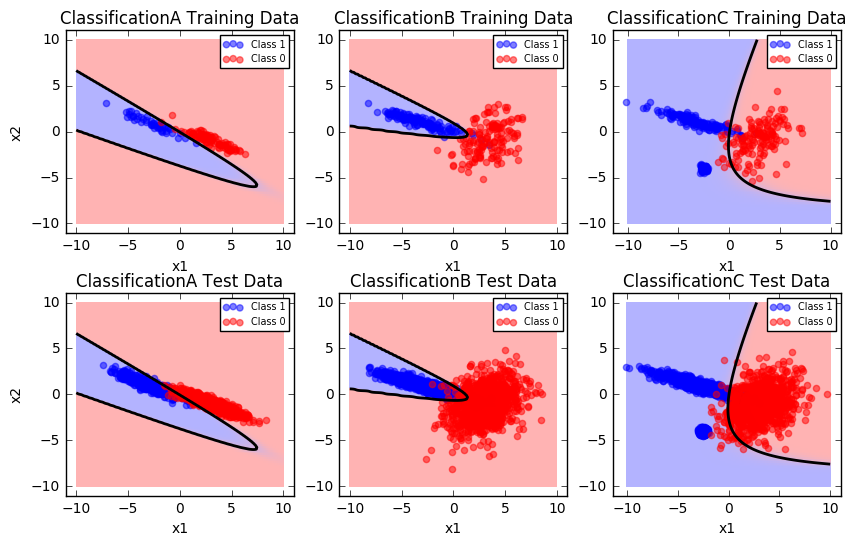

In [37]:
# Represent graphically the data as well as the conic defined by p(y = 1|x) = 0.5
f, axarr = plt.subplots(2, 3, figsize=(10, 6))
axarr[0,0].pcolormesh(xx, yy, predict_proba_A, cmap='red_blue_classes', norm=colors.Normalize(0., 1.))
axarr[0,0].contour(xx, yy, predict_proba_A, [0.5], linewidths=2., colors='k')
axarr[0,0].scatter(trainA[trainA.y==1.0].x1, trainA[trainA.y==1.0].x2, color="blue", alpha=0.5, label = "Class 1")
axarr[0,0].scatter(trainA[trainA.y==0.0].x1, trainA[trainA.y==0.0].x2, color="red", alpha=0.5, label = "Class 0")
axarr[0,0].legend(loc="best", fontsize = 'x-small') 
axarr[0,0].set_xlabel('x1')
axarr[0,0].set_ylabel('x2')
axarr[0,0].set_title('ClassificationA Training Data')

axarr[1,0].pcolormesh(xx, yy, predict_proba_A, cmap='red_blue_classes', norm=colors.Normalize(0., 1.))
axarr[1,0].contour(xx, yy, predict_proba_A, [0.5], linewidths=2., colors='k')
axarr[1,0].scatter(testA[testA.y==1.0].x1, testA[testA.y==1.0].x2, color="blue", alpha=0.5, label = "Class 1")
axarr[1,0].scatter(testA[testA.y==0.0].x1, testA[testA.y==0.0].x2, color="red", alpha=0.5, label = "Class 0")
axarr[1,0].legend(loc="best", fontsize = 'x-small') 
axarr[1,0].set_xlabel('x1')
axarr[1,0].set_ylabel('x2')
axarr[1,0].set_title('ClassificationA Test Data')

axarr[0,1].pcolormesh(xx, yy, predict_proba_B, cmap='red_blue_classes', norm=colors.Normalize(0., 1.))
axarr[0,1].contour(xx, yy, predict_proba_B, [0.5], linewidths=2., colors='k')
axarr[0,1].scatter(trainB[trainB.y==1.0].x1, trainB[trainB.y==1.0].x2, color="blue", alpha=0.5, label = "Class 1")
axarr[0,1].scatter(trainB[trainB.y==0.0].x1, trainB[trainB.y==0.0].x2, color="red", alpha=0.5, label = "Class 0")
axarr[0,1].set_xlabel('x1')
axarr[0,1].legend(loc="best", fontsize = 'x-small') 
axarr[0,1].set_title('ClassificationB Training Data')

axarr[1,1].pcolormesh(xx, yy, predict_proba_B, cmap='red_blue_classes', norm=colors.Normalize(0., 1.))
axarr[1,1].contour(xx, yy, predict_proba_B, [0.5], linewidths=2., colors='k')
axarr[1,1].scatter(testB[testB.y==1.0].x1, testB[testB.y==1.0].x2, color="blue", alpha=0.5, label = "Class 1")
axarr[1,1].scatter(testB[testB.y==0.0].x1, testB[testB.y==0.0].x2, color="red", alpha=0.5, label = "Class 0")
axarr[1,1].set_xlabel('x1')
axarr[1,1].legend(loc="best", fontsize = 'x-small')
axarr[1,1].set_title('ClassificationB Test Data')

axarr[0,2].pcolormesh(xx, yy, predict_proba_C, cmap='red_blue_classes', norm=colors.Normalize(0., 1.))
axarr[0,2].contour(xx, yy, predict_proba_C, [0.5], linewidths=2., colors='k')
axarr[0,2].scatter(trainC[trainC.y==1.0].x1, trainC[trainC.y==1.0].x2, color="blue", alpha=0.5, label = "Class 1")
axarr[0,2].scatter(trainC[trainC.y==0.0].x1, trainC[trainC.y==0.0].x2, color="red", alpha=0.5, label = "Class 0")
axarr[0,2].set_title('ClassificationC Training Data')
axarr[0,2].set_xlabel('x1')
axarr[0,2].legend(loc="best", fontsize = 'x-small') 

axarr[1,2].pcolormesh(xx, yy, predict_proba_C, cmap='red_blue_classes', norm=colors.Normalize(0., 1.))
axarr[1,2].contour(xx, yy, predict_proba_C, [0.5], linewidths=2., colors='k')
axarr[1,2].scatter(testC[testC.y==1.0].x1, testC[testC.y==1.0].x2, color="blue", alpha=0.5, label = "Class 1")
axarr[1,2].scatter(testC[testC.y==0.0].x1, testC[testC.y==0.0].x2, color="red", alpha=0.5, label = "Class 0")
axarr[1,2].legend(loc="best", fontsize = 'x-small') 
axarr[1,2].set_xlabel('x1')
axarr[1,2].set_title('ClassificationC Test Data')

f.subplots_adjust(hspace=0.3)
plt.show()

**(c) Compute the misclassification error for QDA for both train and test data.**

In [38]:
# define a function to compute the misclassification error of QDA
def mis_error(TestData, pi, mu0, mu1, sigma0, sigma1):
    X = np.zeros((len(TestData),2))
    for i in range(len(TestData)):
        X[i][0] = TestData.x1[i]
        X[i][1] = TestData.x2[i]
    predict_proba = QDA_predict(X, pi, mu0, mu1, sigma0, sigma1)
    true_count = 0
    predict = np.zeros(len(TestData))
    for i in range(len(TestData)):
        if predict_proba[i][0]>=0.5:
            predict[i] = 0
        else:
            predict[i] = 1
        if predict[i]==TestData.y[i]:
            true_count += 1
    return 1-true_count*1.0/(len(TestData))

In [39]:
print "QDA classification error of training data A: " + str(mis_error(trainA, pi_A, mu0_A, mu1_A, sigma0_A, sigma1_A))

QDA classification error of training data A: 0.00666666666667


In [40]:
print "QDA classification error of test data A: " + str(mis_error(testA, pi_A, mu0_A, mu1_A, sigma0_A, sigma1_A))

QDA classification error of test data A: 0.02


In [41]:
print "QDA classification error of training data B: " + str(mis_error(trainB, pi_B, mu0_B, mu1_B, sigma0_B, sigma1_B))

QDA classification error of training data B: 0.0133333333333


In [42]:
print "QDA classification error of test data B: " + str(mis_error(testB, pi_B, mu0_B, mu1_B, sigma0_B, sigma1_B))

QDA classification error of test data B: 0.02


In [43]:
print "QDA classification error of training data C: " + str(mis_error(trainC, pi_C, mu0_C, mu1_C, sigma0_C, sigma1_C))

QDA classification error of training data C: 0.0525


In [44]:
print "QDA classification error of test data C: " + str(mis_error(testC, pi_C, mu0_C, mu1_C, sigma0_C, sigma1_C))

QDA classification error of test data C: 0.0383333333333
